Using TensorFlow backend.


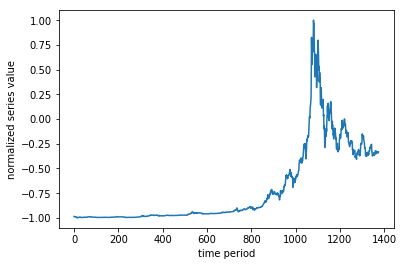

In [1]:
from data_import import *
from data_output import *
from RNN_model import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

dataset = import_dataset('datasets/Bitcoin.csv')

In [17]:
window_size = 3

# With Validation Set?
valid = 1

X,y = window_transform_series(series = dataset,window_size = window_size)
train_percent, split_sets = split_data(X, y, window_size, valid=valid)

In [23]:
# given - fix random seed - so we can all reproduce the same results on our default time series
np.random.seed(0)
epochs = 1000
batch_size = 50
verbose = 0


callbacklist = [epochN()]
if valid:
    callbacklist = [epochN_val()]
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model = build_RNN(window_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_5 (CuDNNLSTM)     (None, 10)                520       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


Epoch 1000/1000
Valid_loss = 0.005612317988972949
Training_loss = 0.0005249851956068265


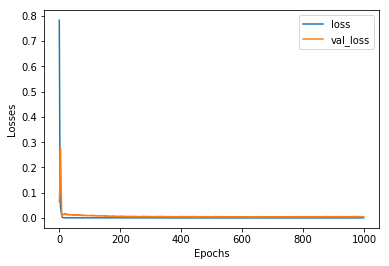

In [24]:
trained_model, predictions = train_model(split_sets, model, epochs, callbacklist, batch_size, optimizer)
plot_loss(trained_model,valid)

In [25]:
# print out training and testing errors
evaluate_model(model, split_sets)

# training error = 0.0004913732423525531
# testing error = 0.0004455560514650321


training error = 0.0005133276654090156
testing error = 0.00047420926763580237


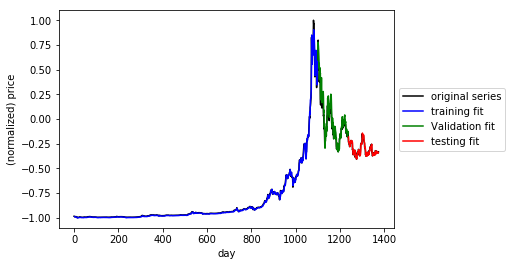

In [21]:
output_plot(dataset, y, window_size, train_percent, predictions)